In [11]:
import pandas as pd
import numpy as np
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [ ]:
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
# Cargar todo el archivo Excel
df_trae = pd.read_excel('/content/drive/MyDrive/Catedra Contra la Corrupcion/Índices por país depurados.xlsx', skiprows=[0])

In [54]:
df = df_trae[['Continente', 'Paises', 'Organizaciones comunales débiles', 'Indicadores de Justicia.', 'Comparación Internacional (Puesto)', 'Confianza y Corrupción (IPC puntos)', 'Criminalidad (TC)', 'Demanda de justicia', 'Efectividad']]
print(df)

    Continente          Paises  Organizaciones comunales débiles  \
0       Europa   Unión Europea                               NaN   
1       Europa       Zona euro                               NaN   
2       Europa        Alemania                               NaN   
3       Europa     Reino Unido                               NaN   
4       Europa         Francia                               NaN   
..         ...             ...                               ...   
131    Oceania         Vanuatu                              0.20   
132    Oceania           Samoa                               NaN   
133    Oceania      Micronesia                              0.20   
134    Oceania  Islas Marshall                               NaN   
135    Oceania        Kiribati                              0.25   

                              Indicadores de Justicia.  \
0                                                0.609   
1                                                  NaN   
2        

In [55]:
# Suponiendo que 'columnas_presentes' es una lista de nombres de columnas
columnas_a_convertir = ['Organizaciones comunales débiles', 'Indicadores de Justicia.', 'Comparación Internacional (Puesto)', 'Confianza y Corrupción (IPC puntos)', 'Criminalidad (TC)', 'Demanda de justicia', 'Efectividad']
df[columnas_a_convertir] = df[columnas_a_convertir].apply(lambda x: pd.to_numeric(x.astype(str), errors='coerce'))

print(df)

    Continente          Paises  Organizaciones comunales débiles  \
0       Europa   Unión Europea                               NaN   
1       Europa       Zona euro                               NaN   
2       Europa        Alemania                               NaN   
3       Europa     Reino Unido                               NaN   
4       Europa         Francia                               NaN   
..         ...             ...                               ...   
131    Oceania         Vanuatu                              0.20   
132    Oceania           Samoa                               NaN   
133    Oceania      Micronesia                              0.20   
134    Oceania  Islas Marshall                               NaN   
135    Oceania        Kiribati                              0.25   

     Indicadores de Justicia.  Comparación Internacional (Puesto)  \
0                       0.609                                 NaN   
1                         NaN                

<ipython-input-55-8efe94c3bbd7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columnas_a_convertir] = df[columnas_a_convertir].apply(lambda x: pd.to_numeric(x.astype(str), errors='coerce'))


In [56]:
# Suponiendo que 'columnas_presentes' es una lista de nombres de columnas
df[columnas_a_convertir] = df[columnas_a_convertir].apply(lambda x: x * 100)

print(df)

    Continente          Paises  Organizaciones comunales débiles  \
0       Europa   Unión Europea                               NaN   
1       Europa       Zona euro                               NaN   
2       Europa        Alemania                               NaN   
3       Europa     Reino Unido                               NaN   
4       Europa         Francia                               NaN   
..         ...             ...                               ...   
131    Oceania         Vanuatu                              20.0   
132    Oceania           Samoa                               NaN   
133    Oceania      Micronesia                              20.0   
134    Oceania  Islas Marshall                               NaN   
135    Oceania        Kiribati                              25.0   

     Indicadores de Justicia.  Comparación Internacional (Puesto)  \
0                        60.9                                 NaN   
1                         NaN                

<ipython-input-56-5e8c11f11a83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columnas_a_convertir] = df[columnas_a_convertir].apply(lambda x: x * 100)


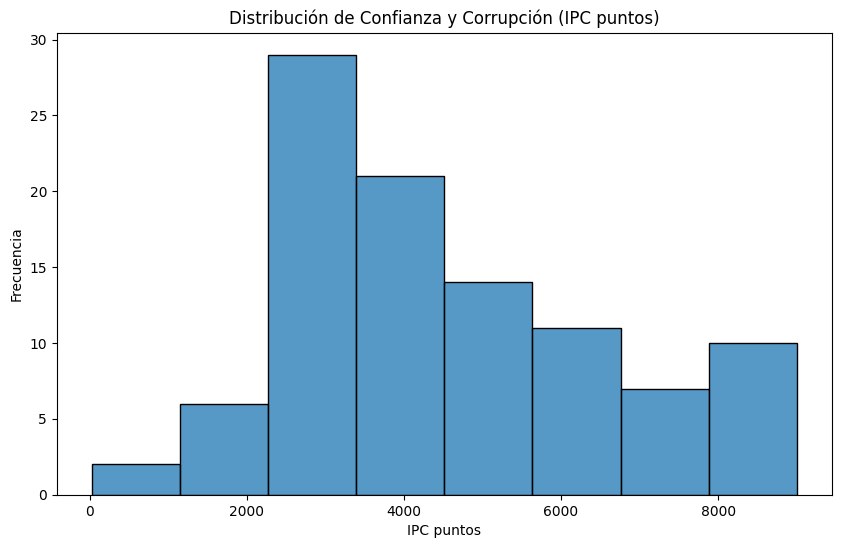

In [57]:
# Supongamos que la variable 'Confianza y Corrupción (IPC puntos)' está en el DataFrame 'datos'
plt.figure(figsize=(10, 6))
sns.histplot(df['Confianza y Corrupción (IPC puntos)'], edgecolor="black")

# Añadir título y etiquetas
plt.title("Distribución de Confianza y Corrupción (IPC puntos)")
plt.xlabel("IPC puntos")
plt.ylabel("Frecuencia")

# Mostrar el gráfico
plt.show()

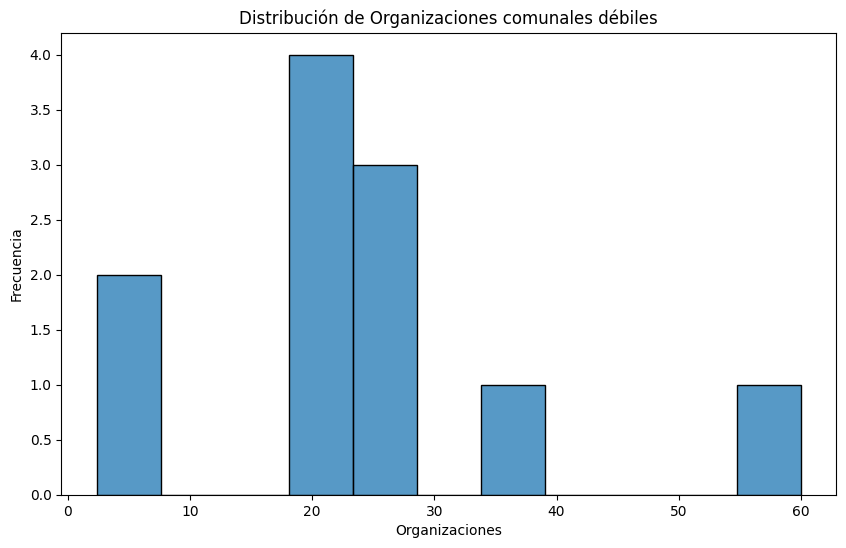

In [43]:
# Supongamos que la variable 'Confianza y Corrupción (IPC puntos)' está en el DataFrame 'datos'
plt.figure(figsize=(10, 6))
sns.histplot(df['Organizaciones comunales débiles'], edgecolor="black")

# Añadir título y etiquetas
plt.title("Distribución de Organizaciones comunales débiles")
plt.xlabel("Organizaciones")
plt.ylabel("Frecuencia")

# Mostrar el gráfico
plt.show()

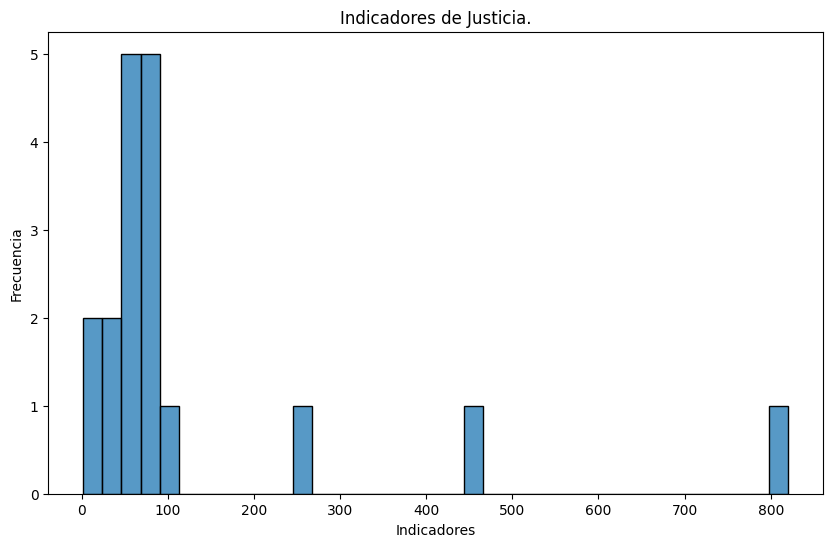

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Indicadores de Justicia.'], edgecolor="black")

# Añadir título y etiquetas
plt.title("Indicadores de Justicia.")
plt.xlabel("Indicadores")
plt.ylabel("Frecuencia")

# Mostrar el gráfico
plt.show()

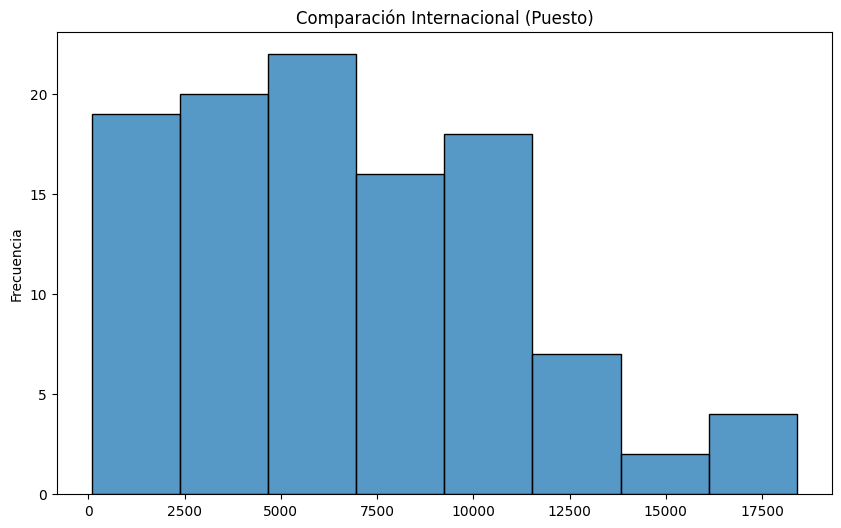

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Comparación Internacional (Puesto)'], edgecolor="black")

# Añadir título y etiquetas
plt.title("Comparación Internacional (Puesto)")
plt.xlabel("")
plt.ylabel("Frecuencia")

# Mostrar el gráfico
plt.show()

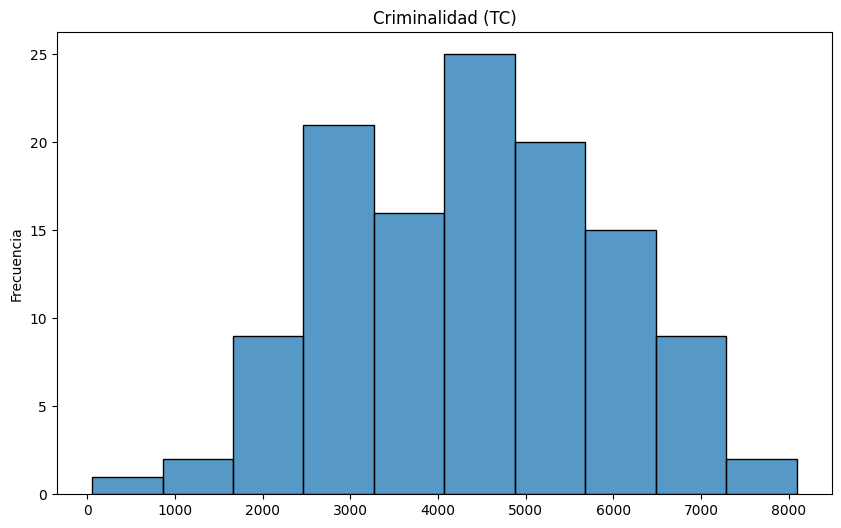

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Criminalidad (TC)'], edgecolor="black")

# Añadir título y etiquetas
plt.title("Criminalidad (TC)")
plt.xlabel("")
plt.ylabel("Frecuencia")

# Mostrar el gráfico
plt.show()

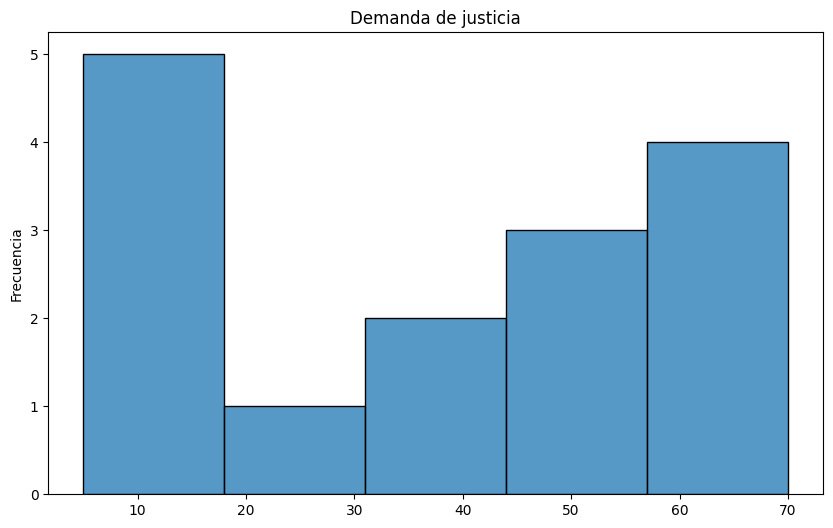

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Demanda de justicia'], edgecolor="black")

# Añadir título y etiquetas
plt.title("Demanda de justicia")
plt.xlabel("")
plt.ylabel("Frecuencia")

# Mostrar el gráfico
plt.show()

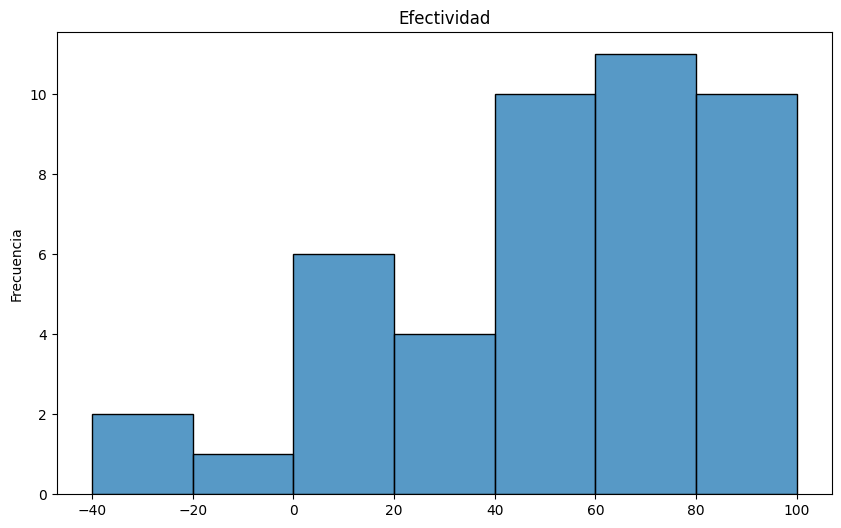

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Efectividad'], edgecolor="black")

# Añadir título y etiquetas
plt.title("Efectividad")
plt.xlabel("")
plt.ylabel("Frecuencia")

# Mostrar el gráfico
plt.show()

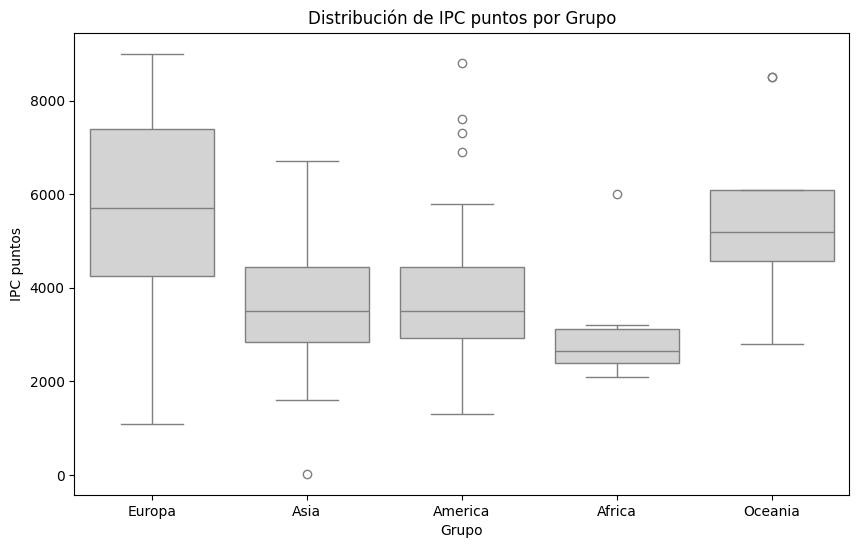

In [58]:
# Supongamos que 'datos' es tu DataFrame y que 'Continente' y 'Confianza y Corrupción (IPC puntos)' son columnas en él.
plt.figure(figsize=(10, 6))

# Crear el boxplot
sns.boxplot(x='Continente', y='Confianza y Corrupción (IPC puntos)', data=df, color="lightgray")

# Añadir título y etiquetas
plt.title("Distribución de IPC puntos por Grupo")
plt.xlabel("Grupo")
plt.ylabel("IPC puntos")

# Mostrar el gráfico
plt.show()

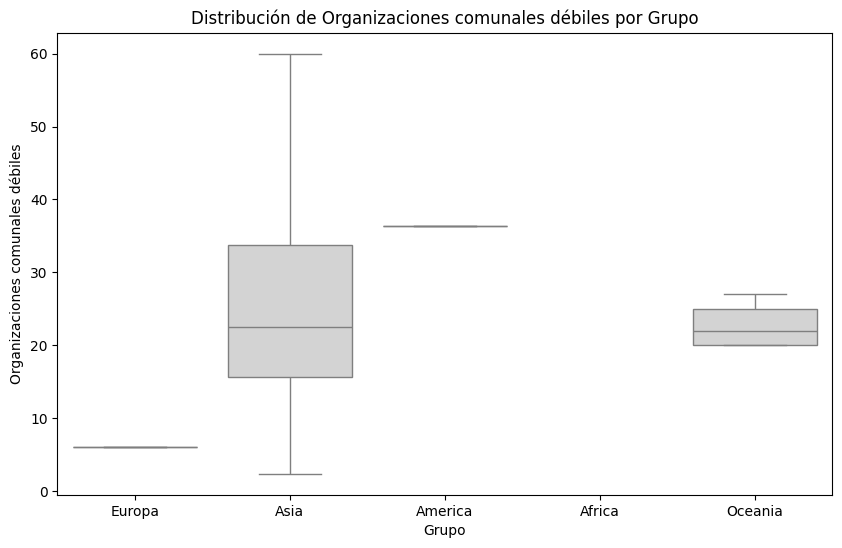

In [59]:
plt.figure(figsize=(10, 6))

# Crear el boxplot
sns.boxplot(x='Continente', y='Organizaciones comunales débiles', data=df, color="lightgray")

# Añadir título y etiquetas
plt.title("Distribución de Organizaciones comunales débiles por Grupo")
plt.xlabel("Grupo")
plt.ylabel("Organizaciones comunales débiles")

# Mostrar el gráfico
plt.show()

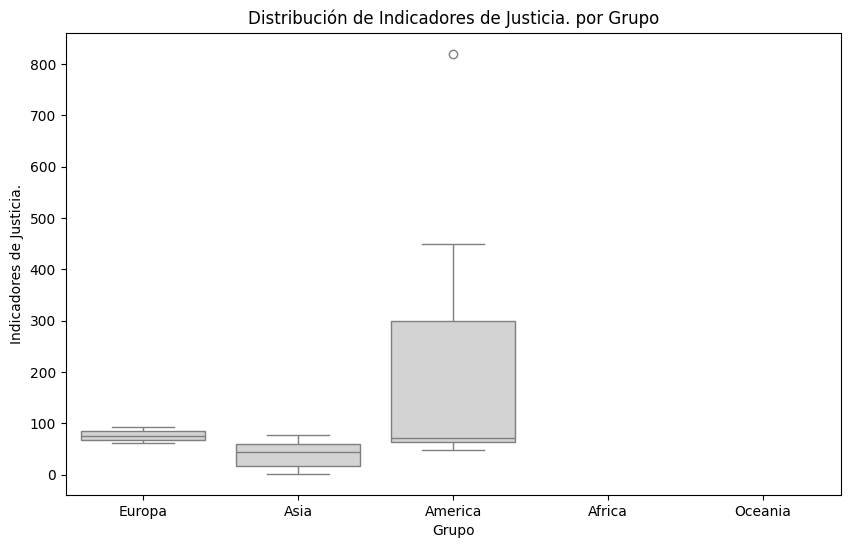

In [60]:
plt.figure(figsize=(10, 6))

# Crear el boxplot
sns.boxplot(x='Continente', y='Indicadores de Justicia.', data=df, color="lightgray")

# Añadir título y etiquetas
plt.title("Distribución de Indicadores de Justicia. por Grupo")
plt.xlabel("Grupo")
plt.ylabel("Indicadores de Justicia.")

# Mostrar el gráfico
plt.show()

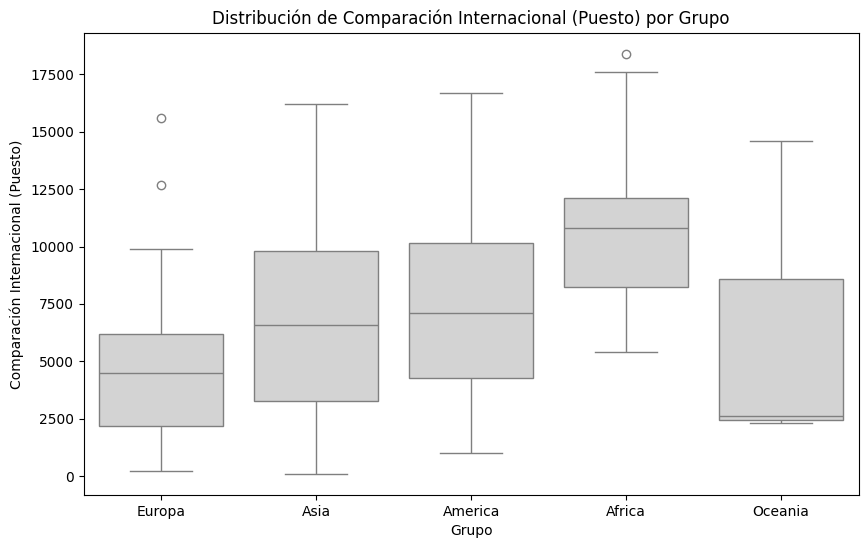

In [62]:
plt.figure(figsize=(10, 6))

# Crear el boxplot
sns.boxplot(x='Continente', y='Comparación Internacional (Puesto)', data=df, color="lightgray")

# Añadir título y etiquetas
plt.title("Distribución de Comparación Internacional (Puesto) por Grupo")
plt.xlabel("Grupo")
plt.ylabel("Comparación Internacional (Puesto)")

# Mostrar el gráfico
plt.show()

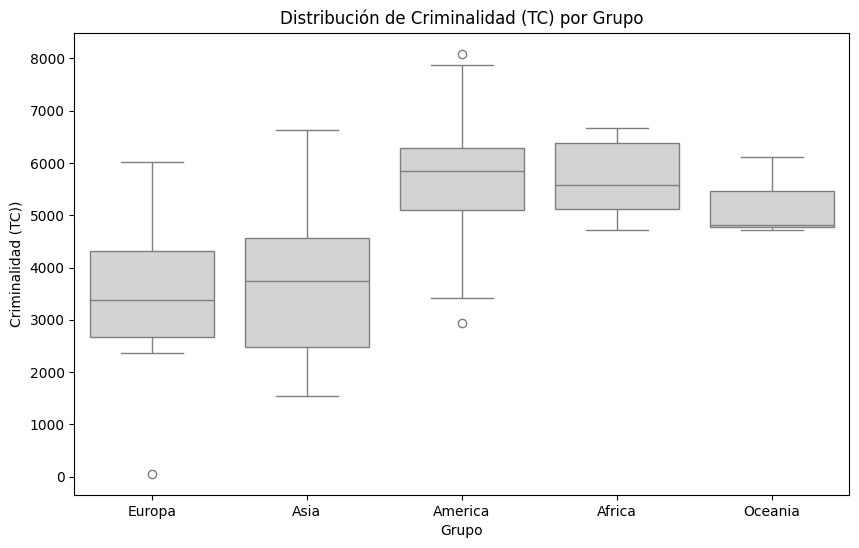

In [63]:
plt.figure(figsize=(10, 6))

# Crear el boxplot
sns.boxplot(x='Continente', y='Criminalidad (TC)', data=df, color="lightgray")

# Añadir título y etiquetas
plt.title("Distribución de Criminalidad (TC) por Grupo")
plt.xlabel("Grupo")
plt.ylabel("Criminalidad (TC))")

# Mostrar el gráfico
plt.show()

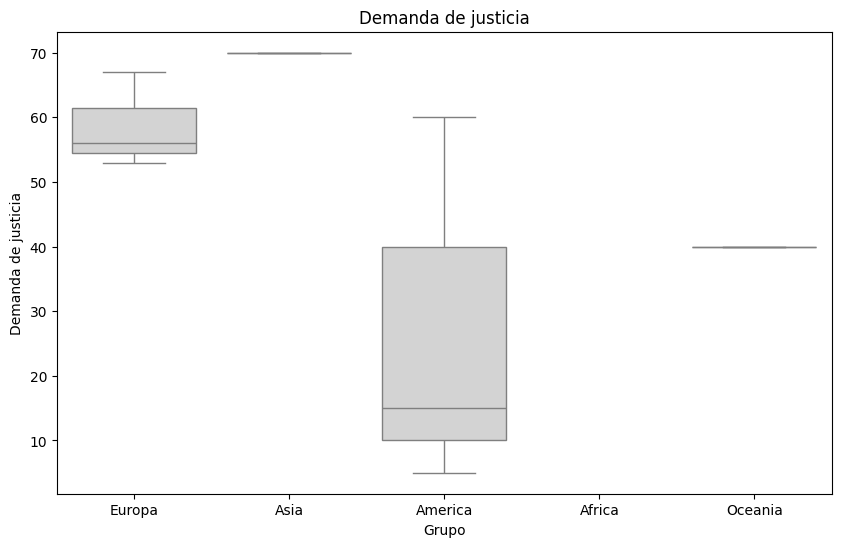

In [64]:
plt.figure(figsize=(10, 6))

# Crear el boxplot
sns.boxplot(x='Continente', y='Demanda de justicia', data=df, color="lightgray")

# Añadir título y etiquetas
plt.title("Demanda de justicia")
plt.xlabel("Grupo")
plt.ylabel("Demanda de justicia")

# Mostrar el gráfico
plt.show()

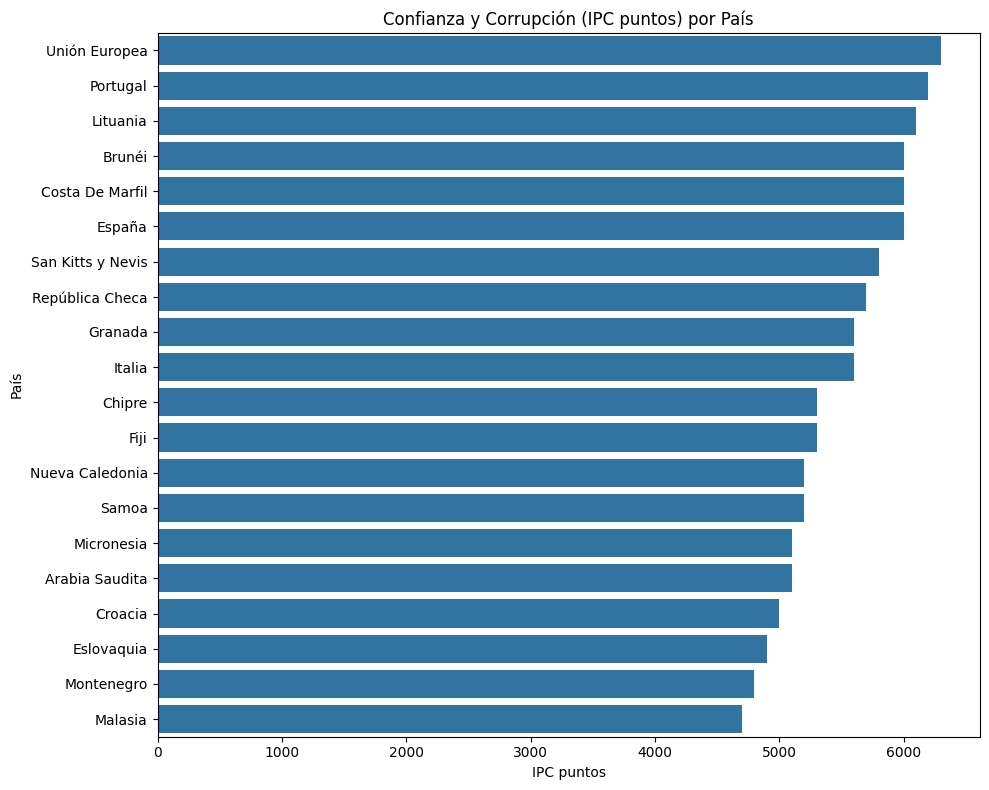

In [67]:
datos_filtrados = df[['Paises', 'Confianza y Corrupción (IPC puntos)']].dropna()
# Ordena los países por la variable de interés de manera descendente
datos_ordenados = datos_filtrados.sort_values(by='Confianza y Corrupción (IPC puntos)', ascending=False)

# Selecciona los 20 países con IPC más alto (cambia estos números si deseas ver otras posiciones)
datos_ordenados = datos_ordenados.iloc[20:40]

plt.figure(figsize=(10, 8))

# Crear el diagrama de barras
sns.barplot(x='Confianza y Corrupción (IPC puntos)', y='Paises', data=datos_ordenados)

# Añadir título y etiquetas
plt.title('Confianza y Corrupción (IPC puntos) por País')
plt.xlabel('IPC puntos')
plt.ylabel('País')

# Mejorar la visualización
plt.tight_layout()

# Mostrar el gráfico
plt.show()

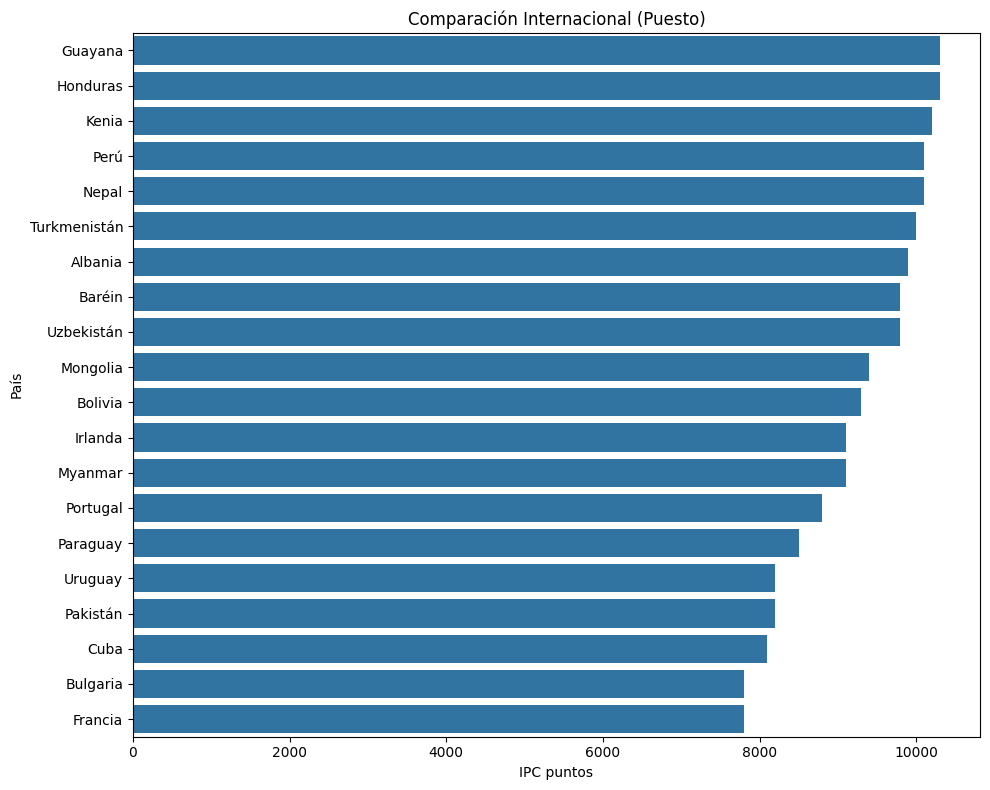

In [70]:
datos_filtrados = df[['Paises', 'Comparación Internacional (Puesto)']].dropna()
# Ordena los países por la variable de interés de manera descendente
datos_ordenados = datos_filtrados.sort_values(by='Comparación Internacional (Puesto)', ascending=False)

# Selecciona los 20 países con IPC más alto (cambia estos números si deseas ver otras posiciones)
datos_ordenados = datos_ordenados.iloc[20:40]

plt.figure(figsize=(10, 8))

# Crear el diagrama de barras
sns.barplot(x='Comparación Internacional (Puesto)', y='Paises', data=datos_ordenados)

# Añadir título y etiquetas
plt.title('Comparación Internacional (Puesto)')
plt.xlabel('IPC puntos')
plt.ylabel('País')

# Mejorar la visualización
plt.tight_layout()

# Mostrar el gráfico
plt.show()

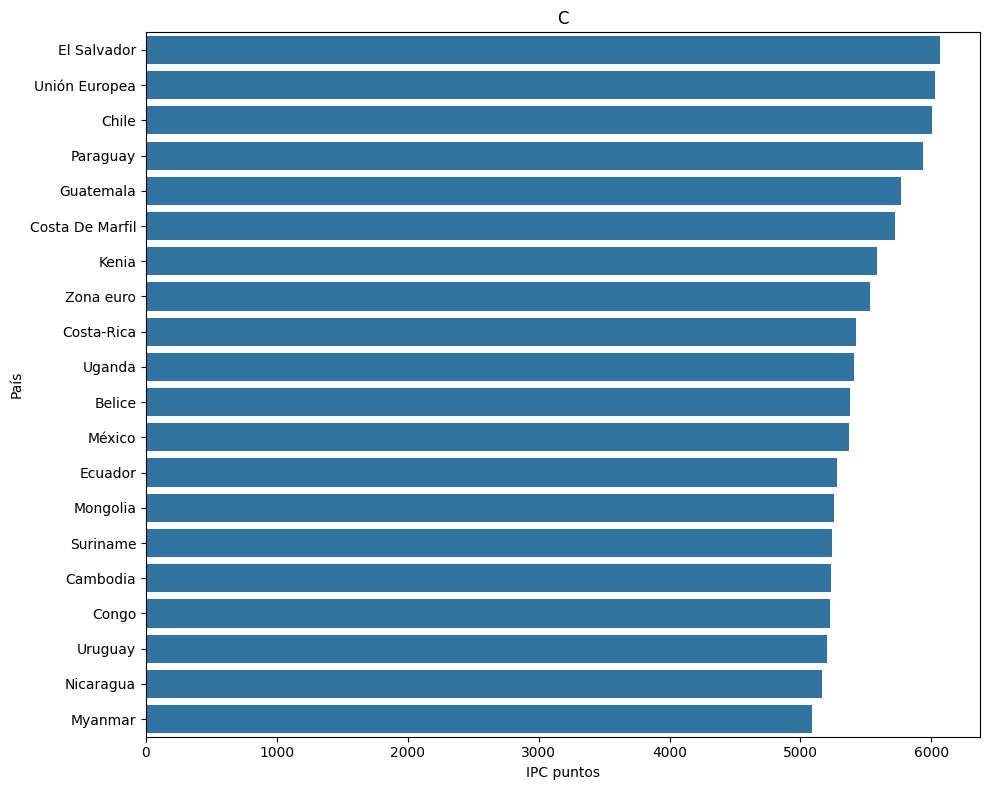

In [73]:
datos_filtrados = df[['Paises', 'Criminalidad (TC)']].dropna()
# Ordena los países por la variable de interés de manera descendente
datos_ordenados = datos_filtrados.sort_values(by='Criminalidad (TC)', ascending=False)

# Selecciona los 20 países con IPC más alto (cambia estos números si deseas ver otras posiciones)
datos_ordenados = datos_ordenados.iloc[20:40]

plt.figure(figsize=(10, 8))

# Crear el diagrama de barras
sns.barplot(x='Criminalidad (TC)', y='Paises', data=datos_ordenados)

# Añadir título y etiquetas
plt.title('C')
plt.xlabel('IPC puntos')
plt.ylabel('País')

# Mejorar la visualización
plt.tight_layout()

# Mostrar el gráfico
plt.show()

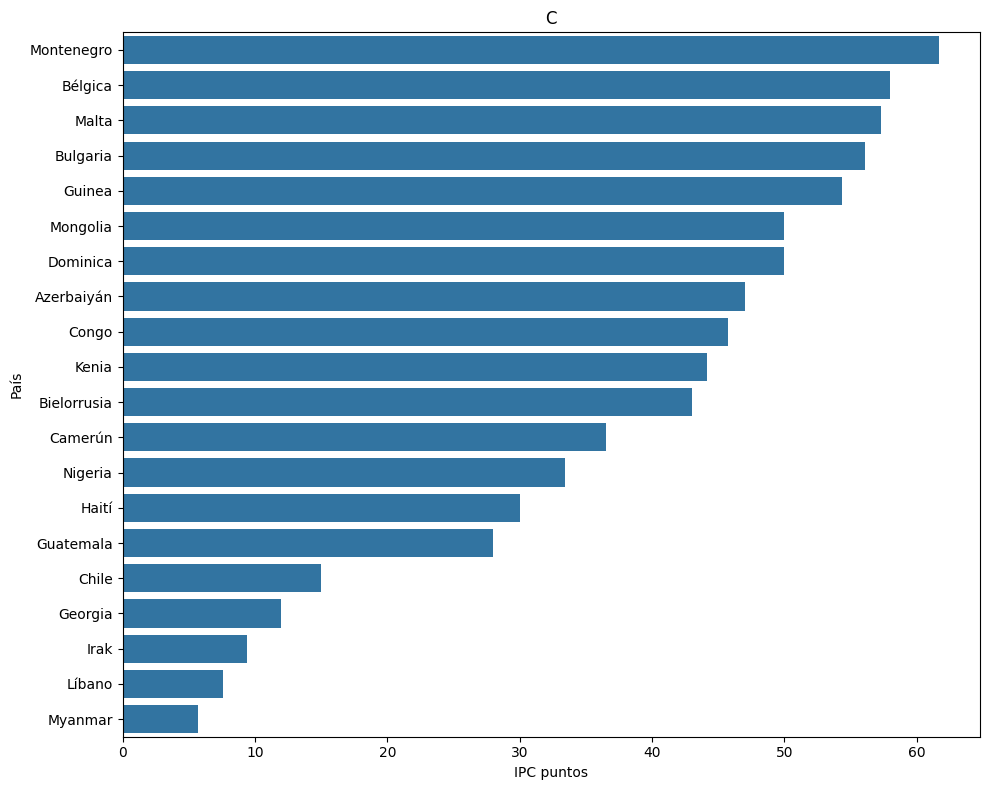

In [74]:
datos_filtrados = df[['Paises', 'Efectividad']].dropna()
# Ordena los países por la variable de interés de manera descendente
datos_ordenados = datos_filtrados.sort_values(by='Efectividad', ascending=False)

# Selecciona los 20 países con IPC más alto (cambia estos números si deseas ver otras posiciones)
datos_ordenados = datos_ordenados.iloc[20:40]

plt.figure(figsize=(10, 8))

# Crear el diagrama de barras
sns.barplot(x='Efectividad', y='Paises', data=datos_ordenados)

# Añadir título y etiquetas
plt.title('C')
plt.xlabel('IPC puntos')
plt.ylabel('País')

# Mejorar la visualización
plt.tight_layout()

# Mostrar el gráfico
plt.show()

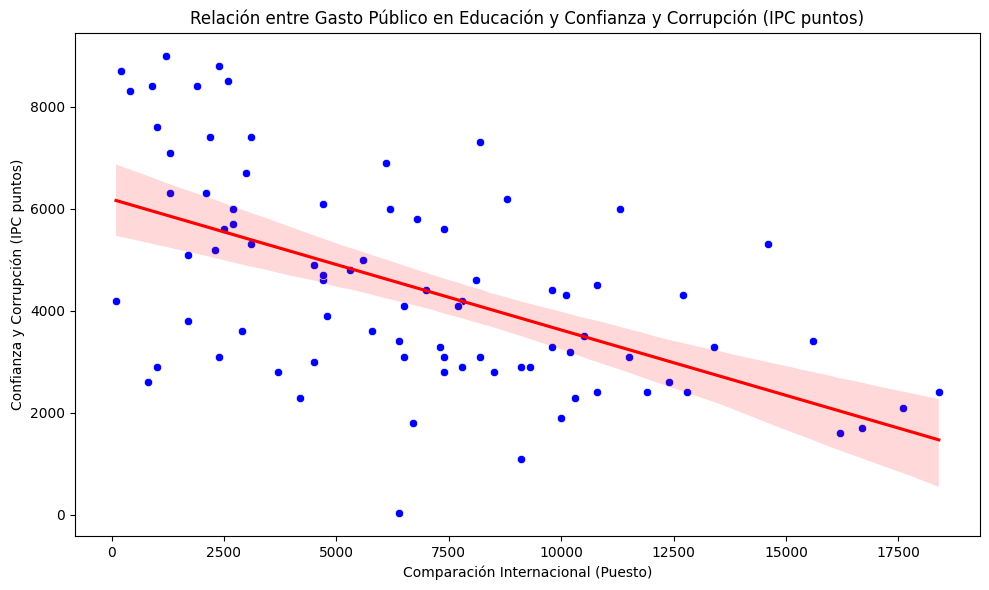

Coeficiente de correlación de Pearson: -0.5631
     Comparación Internacional (Puesto)  Confianza y Corrupción (IPC puntos)
126                             18400.0                               2400.0
122                             17600.0                               2100.0
104                             16700.0                               1700.0
76                              16200.0                               1600.0
31                              15600.0                               3400.0
130                             14600.0                               5300.0
56                              13400.0                               3300.0
72                              12800.0                               2400.0
37                              12700.0                               4300.0
124                             12400.0                               2600.0
62                                100.0                               4200.0
20                           

In [82]:
columnas = [
    "Comparación Internacional (Puesto)",
    "Confianza y Corrupción (IPC puntos)"
]

# Elimina filas con valores faltantes en las columnas relevantes
datos_filtrados = df[columnas].dropna()

# Crea el gráfico de dispersión
plt.figure(figsize=(10, 6))

# Crear el gráfico de dispersión
sns.scatterplot(
    x="Comparación Internacional (Puesto)",
    y="Confianza y Corrupción (IPC puntos)",
    data=datos_filtrados,
    color="blue"
)

# Añadir una línea de tendencia
sns.regplot(
    x="Comparación Internacional (Puesto)",
    y="Confianza y Corrupción (IPC puntos)",
    data=datos_filtrados,
    scatter=False,
    color="red"
)

# Añadir título y etiquetas
plt.title("Relación entre Gasto Público en Educación y Confianza y Corrupción (IPC puntos)")
plt.xlabel("Comparación Internacional (Puesto)")
plt.ylabel("Confianza y Corrupción (IPC puntos)")

# Mejorar la visualización
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Elimina filas con valores faltantes en las columnas relevantes
datos_filtrados_completos = df[columnas].dropna()

# Calcula el coeficiente de correlación de Pearson
correlacion = datos_filtrados_completos.corr(method='pearson').iloc[0, 1]

# Imprime el resultado
print(f"Coeficiente de correlación de Pearson: {correlacion:.4f}")

datos_filtrados = df[columnas].dropna()

# Ordena los datos por "Gasto público en educación en porcentaje del gasto total del Estado"
# y selecciona los 10 valores más altos y más bajos
valores_extremos = pd.concat([
    datos_filtrados.sort_values(by="Comparación Internacional (Puesto)", ascending=False).head(10),
    datos_filtrados.sort_values(by="Comparación Internacional (Puesto)", ascending=True).head(10)
])

# Imprime los resultados
print(valores_extremos)

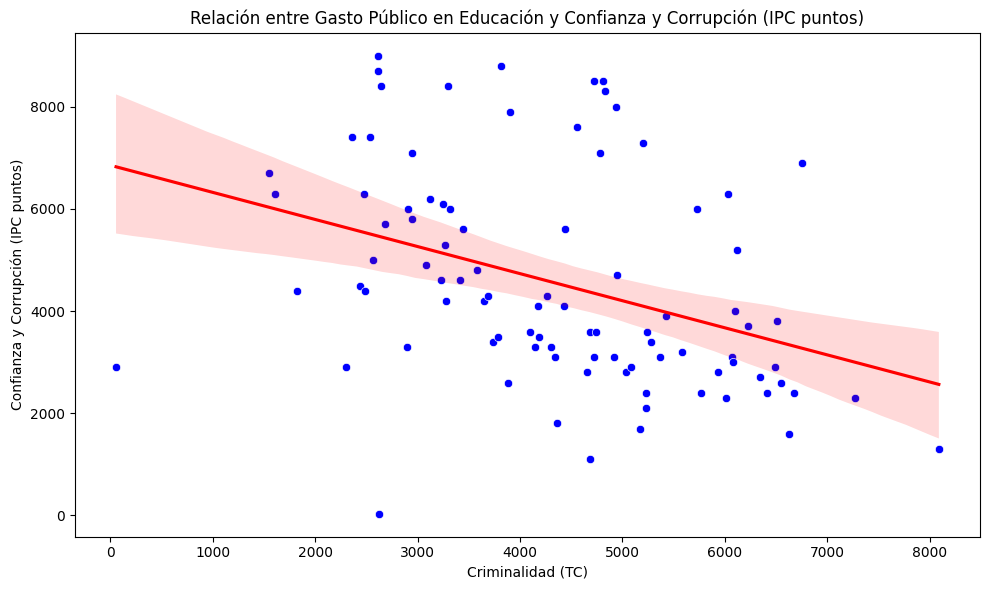

Coeficiente de correlación de Pearson: -0.3785
     Criminalidad (TC)  Confianza y Corrupción (IPC puntos)
93             8090.00                               1300.0
101            7268.00                               2300.0
103            6753.00                               6900.0
117            6671.00                               2400.0
76             6623.00                               1600.0
124            6547.00                               2600.0
83             6511.00                               3800.0
98             6494.00                               2900.0
126            6411.00                               2400.0
125            6348.00                               2700.0
4                55.32                               2900.0
49             1551.00                               6700.0
60             1604.00                               6300.0
63             1823.00                               4400.0
51             2301.00                               

In [83]:
columnas = [
    "Criminalidad (TC)",
    "Confianza y Corrupción (IPC puntos)"
]

# Elimina filas con valores faltantes en las columnas relevantes
datos_filtrados = df[columnas].dropna()

# Crea el gráfico de dispersión
plt.figure(figsize=(10, 6))

# Crear el gráfico de dispersión
sns.scatterplot(
    x="Criminalidad (TC)",
    y="Confianza y Corrupción (IPC puntos)",
    data=datos_filtrados,
    color="blue"
)

# Añadir una línea de tendencia
sns.regplot(
    x="Criminalidad (TC)",
    y="Confianza y Corrupción (IPC puntos)",
    data=datos_filtrados,
    scatter=False,
    color="red"
)

# Añadir título y etiquetas
plt.title("Relación entre Gasto Público en Educación y Confianza y Corrupción (IPC puntos)")
plt.xlabel("Criminalidad (TC)")
plt.ylabel("Confianza y Corrupción (IPC puntos)")

# Mejorar la visualización
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Elimina filas con valores faltantes en las columnas relevantes
datos_filtrados_completos = df[columnas].dropna()

# Calcula el coeficiente de correlación de Pearson
correlacion = datos_filtrados_completos.corr(method='pearson').iloc[0, 1]

# Imprime el resultado
print(f"Coeficiente de correlación de Pearson: {correlacion:.4f}")

# y selecciona los 10 valores más altos y más bajos
valores_extremos = pd.concat([
    datos_filtrados.sort_values(by="Criminalidad (TC)", ascending=False).head(10),
    datos_filtrados.sort_values(by="Criminalidad (TC)", ascending=True).head(10)
])

# Imprime los resultados
print(valores_extremos)

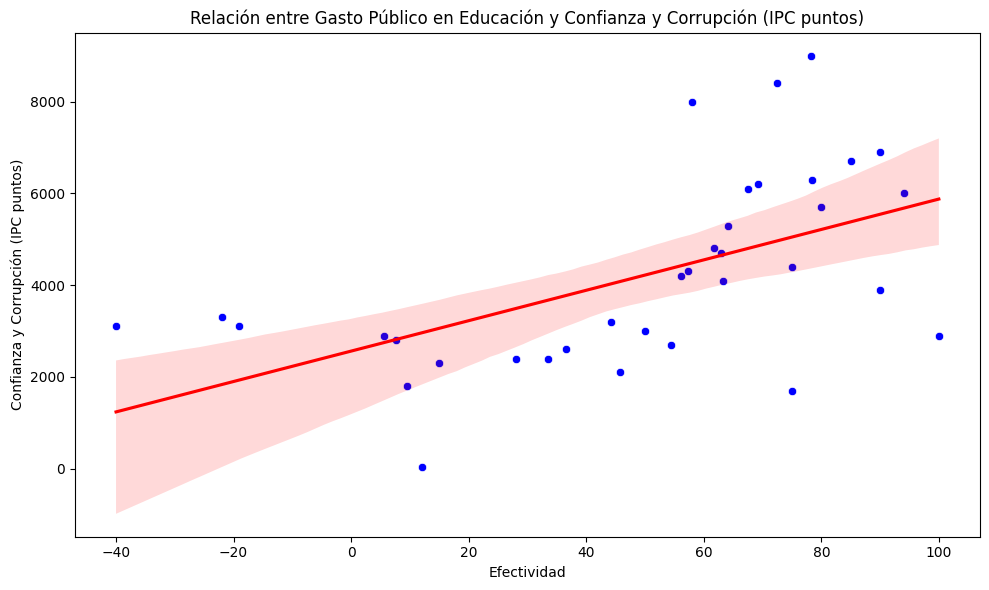

Coeficiente de correlación de Pearson: 0.5569
     Efectividad  Confianza y Corrupción (IPC puntos)
51        100.00                               2900.0
7          94.00                               6000.0
103        90.00                               6900.0
97         90.00                               3900.0
49         85.00                               6700.0
19         80.00                               5700.0
0          78.40                               6300.0
17         78.30                               9000.0
63         75.00                               4400.0
104        75.00                               1700.0
100       -40.00                               3100.0
35        -22.00                               3300.0
84        -19.00                               3100.0
67          5.66                               2900.0
75          7.55                               2800.0
59          9.43                               1800.0
73         12.00                    

In [84]:
columnas = [
    "Efectividad",
    "Confianza y Corrupción (IPC puntos)"
]

# Elimina filas con valores faltantes en las columnas relevantes
datos_filtrados = df[columnas].dropna()

# Crea el gráfico de dispersión
plt.figure(figsize=(10, 6))

# Crear el gráfico de dispersión
sns.scatterplot(
    x="Efectividad",
    y="Confianza y Corrupción (IPC puntos)",
    data=datos_filtrados,
    color="blue"
)

# Añadir una línea de tendencia
sns.regplot(
    x="Efectividad",
    y="Confianza y Corrupción (IPC puntos)",
    data=datos_filtrados,
    scatter=False,
    color="red"
)

# Añadir título y etiquetas
plt.title("Relación entre Gasto Público en Educación y Confianza y Corrupción (IPC puntos)")
plt.xlabel("Efectividad")
plt.ylabel("Confianza y Corrupción (IPC puntos)")

# Mejorar la visualización
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Elimina filas con valores faltantes en las columnas relevantes
datos_filtrados_completos = df[columnas].dropna()

# Calcula el coeficiente de correlación de Pearson
correlacion = datos_filtrados_completos.corr(method='pearson').iloc[0, 1]

# Imprime el resultado
print(f"Coeficiente de correlación de Pearson: {correlacion:.4f}")

# y selecciona los 10 valores más altos y más bajos
valores_extremos = pd.concat([
    datos_filtrados.sort_values(by="Efectividad", ascending=False).head(10),
    datos_filtrados.sort_values(by="Efectividad", ascending=True).head(10)
])

# Imprime los resultados
print(valores_extremos)